In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit

**simple linear function**

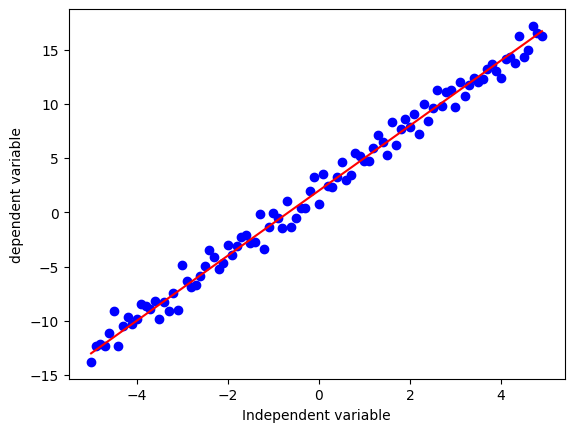

In [5]:
# y = mx +c

x = np.arange(-5,5,0.1)
y = 3*(x) + 2
y_noise = np.random.normal(size=x.size)
y_data = y + y_noise
plt.plot(x,y_data,'bo')
plt.plot(x,y,'r')
plt.xlabel('Independent variable')
plt.ylabel('dependent variable')
plt.show()


**Non linear functiom**

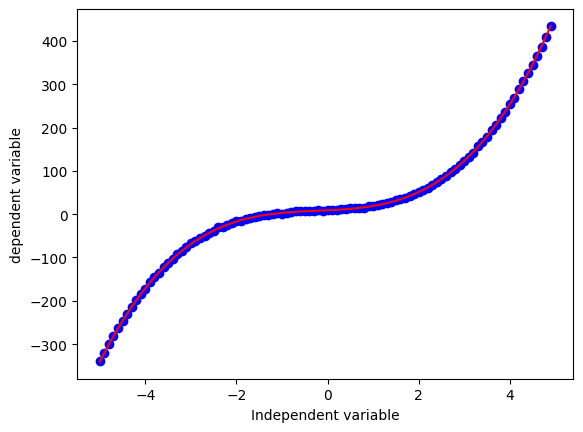

In [6]:
# y = ax^3 + bx^2 + cx + d

x = np.arange(-5,5,0.1)
y = 3*(x**3) + 2*(x**2) + 5*(x) + 9
y_noise = np.random.normal(size=x.size)
y_data = y + y_noise
plt.plot(x,y_data,'bo')
plt.plot(x,y,'r')
plt.xlabel('Independent variable')
plt.ylabel('dependent variable')
plt.show()

**Quadratic function**

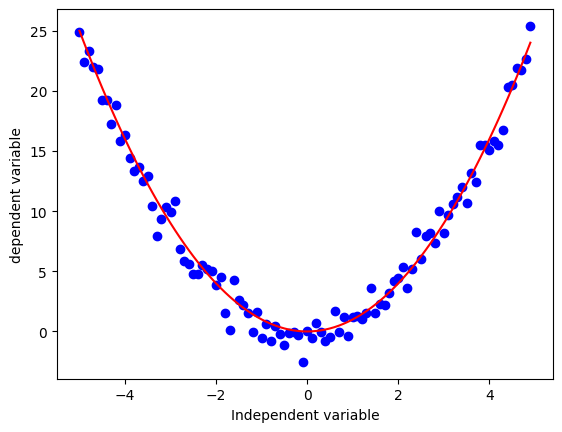

In [7]:
# y = x^2

x = np.arange(-5,5,0.1)
y = np.power(x,2)
y_noise = np.random.normal(size=x.size)
y_data = y + y_noise
plt.plot(x,y_data,'bo')
plt.plot(x,y,'r')
plt.xlabel('Independent variable')
plt.ylabel('dependent variable')
plt.show()

**Exponential**

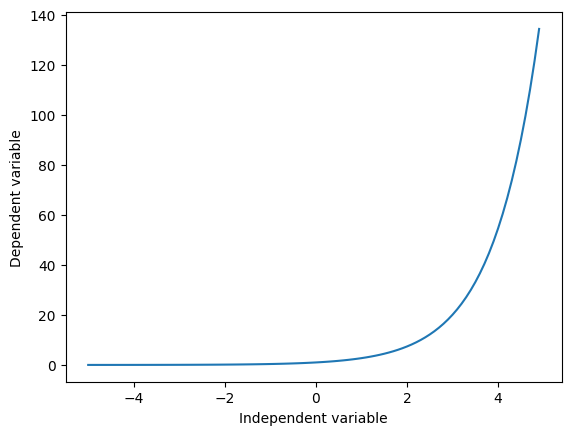

In [8]:
# y = a +bc^x

x = np.arange(-5,5,0.1)
y = np. exp(x)
plt.plot(x,y)
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.show()

**Logarithmic**

C:\Users\malik bros\AppData\Local\Temp\ipykernel_12096\1719187704.py:4: RuntimeWarning: invalid value encountered in log
  y = np.log(x)


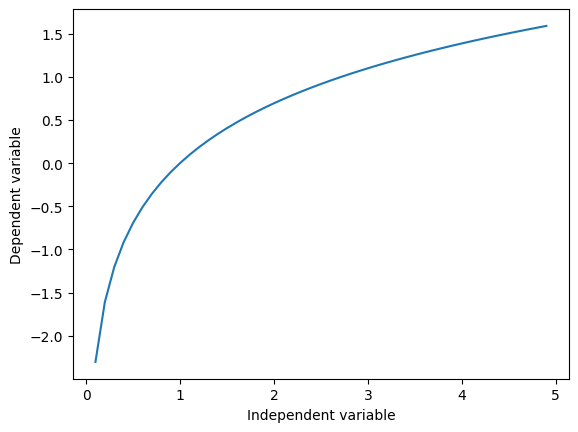

In [9]:
# y = log(x)

x = np.arange(-5,5,0.1)
y = np.log(x)
plt.plot(x,y)
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.show()

**Logistic**

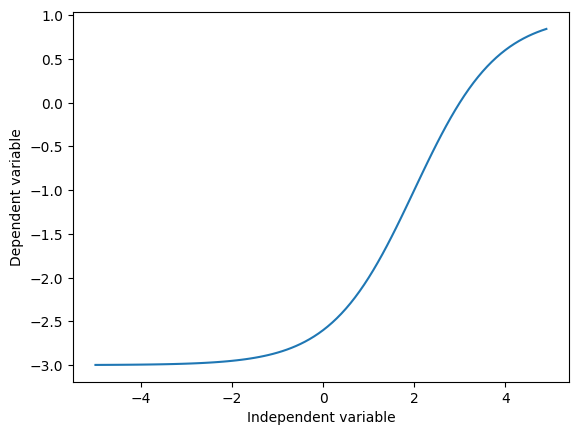

In [10]:
x = np.arange(-5,5,0.1)
y = 1-4/(1+np.power(3,x-2))
plt.plot(x,y)
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.show()

# Non linear regression model

In [13]:
df = pd.read_csv('china_gdp.csv')
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


In [15]:
df.shape

(55, 2)

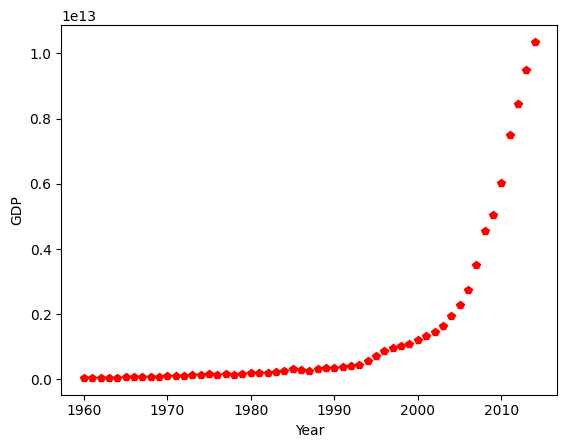

In [18]:
x_data , y_data = (df['Year'].values , df['Value'].values)
plt.plot(x_data,y_data,'rp')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()

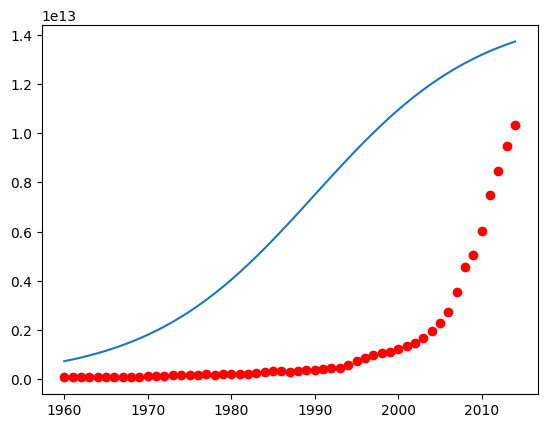

In [21]:
# Model selection
# it is much similar to logistic 

# formula of logistic

#y = 1 / (1+ e ^ beta1(x-beta2))

# regression model


def sigmoid(x,beta1,beta2):
    y = 1/ (1+ np.exp(-beta1*(x-beta2)))
    return y

beta1 = 0.1
beta2 = 1990

# logistic regression

y_pred = sigmoid(x_data,beta1,beta2)

# plot initial prediction

plt.plot(x_data,y_pred*15000000000000)
plt.plot(x_data,y_data,'ro')
plt.show()

In [25]:
#lets normalize our data

xdata = x_data/max(x_data)
ydata = y_data/max(y_data)


In [26]:
#to fit sigmoid we use here curve_fit function

popt ,pcov = curve_fit(sigmoid,xdata,ydata)
print('beta1 = %f,beta2=%f' %(popt[0],popt[1]))

beta1 = 690.451711,beta2=0.997207


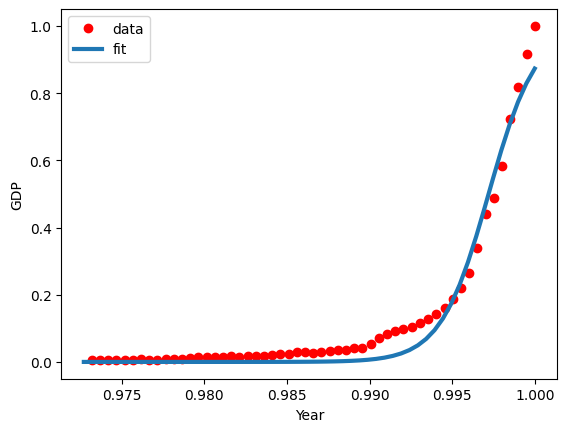

In [28]:
#regression model

x = np.linspace(1960,2015,55)
x = x/max(x)
y = sigmoid(x,*popt)
plt.plot(xdata,ydata,'ro',label='data')
plt.plot(x,y,linewidth=3,label='fit')
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()

# Polynomial Regression

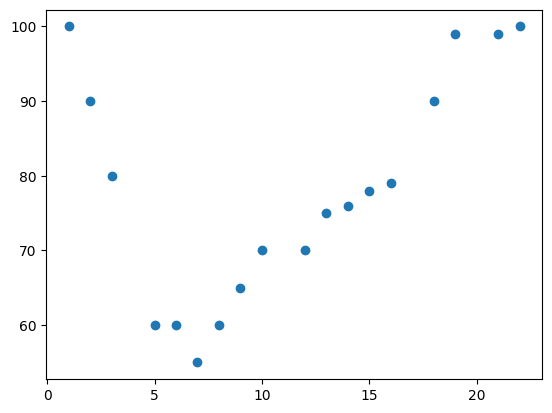

In [31]:
x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]
plt.scatter(x,y)
plt.show()

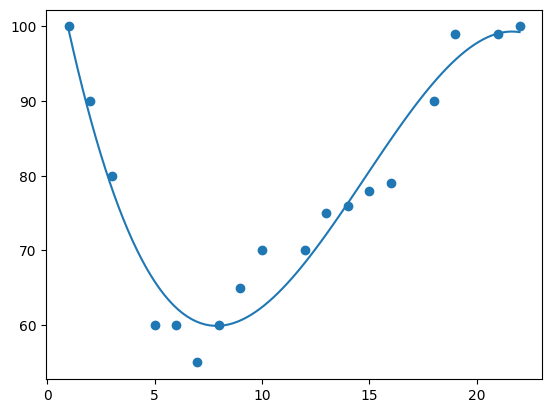

In [32]:
mymodel = np.poly1d(np.polyfit(x,y,3))
myline = np.linspace(1,22,100)
plt.scatter(x,y)
plt.plot(myline,mymodel(myline))
plt.show()

In [34]:
print(r2_score(y,mymodel(x)))

0.9432150416451026


In [35]:
# prediction of a car speed passes at5 pm

speed = mymodel(17)
print(speed)

88.87331269697998
